In [ ]:
!pip install scikit-learn


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
dataset=pd.read_csv('Copper_Set.xlsx - Result 1.csv')
dataset

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
datas=dataset.copy()
datas

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [5]:
material_null=datas['material_ref'].str.startswith("000000")
replace_null=(material_null==True)
datas['material_ref'][replace_null]=np.NaN

In [6]:
datas

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,NaN,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,NaN,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,NaN,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,NaN,164141591,20200701.0,601.00


In [7]:
# Assuming you have a DataFrame named df
datas.rename(columns={'quantity tons': 'quantity_tons','delivery date': 'delivery_date'}, inplace=True)


In [8]:
# Assuming 'dataset' is a Pandas DataFrame
missing_values = datas.isnull().sum()
missing_values


id                    2
item_date             1
quantity_tons         0
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery_date         1
selling_price         1
dtype: int64

In [8]:
datas.isnull().sum().sum()

100706

In [9]:
# datas.dropna(subset=['item_date','id','delivery_date'], inplace=True)

In [10]:
datas.dropna(inplace=True)

In [11]:
datas.isnull().sum()

id               0
item_date        0
quantity_tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64

In [12]:
datas['item_date'] = pd.to_datetime(datas['item_date'])
datas['delivery_date'] = pd.to_datetime(datas['delivery_date'])

In [13]:
datas.isnull().sum().sum()

0

In [14]:
# import pandas as pd

# # Assuming 'dataset' is your DataFrame
# # Convert 'item_date' to a string
# datas['item_date'] = datas['item_date'].astype(str)

# # Use string slicing to format the date (YYYYMMDD to YYYY-MM-DD)
# datas['item_date'] = datas['item_date'].apply(lambda x: f"{x[:4]}-{x[4:6]}-{x[6:8]}")

# # Now, the 'item_date' column should have the date in the desired format


In [15]:
datas['customer'].fillna(datas['customer'].mean(), inplace = True)
datas['country'].fillna(datas['country'].mean(), inplace = True)
datas['application'].fillna(datas['application'].mean(), inplace = True)
datas['thickness'].fillna(datas['thickness'].mean(), inplace = True)
# datas['material_ref'].fillna(datas['material_ref'].mode()[0],inplace=True)
datas['selling_price'].fillna(datas['selling_price'].mean(),inplace=True)
datas['status'].fillna(datas['status'].mode()[0],inplace=True)

In [16]:
# datas['delivery_date'] = pd.to_datetime(datas['delivery_date'], format='%Y%m%d', errors='coerce')

In [17]:
# datas['item_date'].fillna(datas['item_date'].mode()[0], inplace = True)
# datas['delivery_date'].fillna(datas['delivery_date'].mean(), inplace = True)

In [18]:
datas

,id,item_date,quantity_tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01 00:00:00.020210401,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01 00:00:00.020210701,854.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-01-01 00:00:00.020210401,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01 00:00:00.020210101,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-01-01 00:00:00.020210401,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01 00:00:00.020210101,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-01-01 00:00:00.020210401,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-01-01 00:00:00.020210301,577.00
6,E1B47219-42C8-411D-AE46-AD5256DC4757,1970-01-01 00:00:00.020210401,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,611993,1970-01-01 00:00:00.020210701,18.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181601,9520F0DD-4EA3-4D35-B23A-35908C5E77CA,1970-01-01 00:00:00.020200702,3.739725626,30267349.0,84.0,Revised,W,10.0,2.00,1500.0,1S220A100P6FSB,164141591,1970-01-01 00:00:00.020200701,622.81
181602,D85912F7-0002-4EC5-9CFD-AD3803F44D91,1970-01-01 00:00:00.020200702,20.15511929,30267349.0,84.0,Revised,W,10.0,2.00,1500.0,1S220A100P6FSA,164141591,1970-01-01 00:00:00.020200701,619.81
181603,E6A94878-F80E-4852-A217-928D6D9C4A28,1970-01-01 00:00:00.020200702,15.74226571,30267349.0,84.0,Revised,W,10.0,2.00,1000.0,1S220A100P6FSA,164141591,1970-01-01 00:00:00.020200701,628.52
181604,B40F8127-D4AC-44B6-B200-FED2690EA8EF,1970-01-01 00:00:00.020200702,16.39100871,30267349.0,84.0,Revised,W,10.0,2.00,1250.0,1S220A100P6FSA,164141591,1970-01-01 00:00:00.020200701,615.81


In [19]:
datas.isnull().sum()

id               0
item_date        0
quantity_tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64

In [20]:
datas

,id,item_date,quantity_tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01 00:00:00.020210401,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01 00:00:00.020210701,854.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-01-01 00:00:00.020210401,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01 00:00:00.020210101,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-01-01 00:00:00.020210401,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01 00:00:00.020210101,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-01-01 00:00:00.020210401,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-01-01 00:00:00.020210301,577.00
6,E1B47219-42C8-411D-AE46-AD5256DC4757,1970-01-01 00:00:00.020210401,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,611993,1970-01-01 00:00:00.020210701,18.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181601,9520F0DD-4EA3-4D35-B23A-35908C5E77CA,1970-01-01 00:00:00.020200702,3.739725626,30267349.0,84.0,Revised,W,10.0,2.00,1500.0,1S220A100P6FSB,164141591,1970-01-01 00:00:00.020200701,622.81
181602,D85912F7-0002-4EC5-9CFD-AD3803F44D91,1970-01-01 00:00:00.020200702,20.15511929,30267349.0,84.0,Revised,W,10.0,2.00,1500.0,1S220A100P6FSA,164141591,1970-01-01 00:00:00.020200701,619.81
181603,E6A94878-F80E-4852-A217-928D6D9C4A28,1970-01-01 00:00:00.020200702,15.74226571,30267349.0,84.0,Revised,W,10.0,2.00,1000.0,1S220A100P6FSA,164141591,1970-01-01 00:00:00.020200701,628.52
181604,B40F8127-D4AC-44B6-B200-FED2690EA8EF,1970-01-01 00:00:00.020200702,16.39100871,30267349.0,84.0,Revised,W,10.0,2.00,1250.0,1S220A100P6FSA,164141591,1970-01-01 00:00:00.020200701,615.81


In [21]:
datas.isnull().sum()

id               0
item_date        0
quantity_tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64

In [22]:
datas.dtypes

id                       object
item_date        datetime64[ns]
quantity_tons            object
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery_date    datetime64[ns]
selling_price           float64
dtype: object

# # Treating outliers and cliping methods

In [23]:
datas['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')

In [24]:
datas.describe()

,quantity_tons,customer,country,application,thickness,width,product_ref,selling_price
count,8.102400e+04,8.102400e+04,81024.000000,81024.000000,81024.000000,81024.000000,8.102400e+04,81024.000000
mean,1.244196e+04,3.022684e+07,45.627913,26.346786,2.298850,1287.291045,3.943268e+08,804.297823
std,3.513121e+06,6.982724e+04,24.320401,17.865641,2.940936,246.046127,6.749962e+08,368.064795
min,1.867763e-03,3.014772e+07,25.000000,2.000000,0.180000,20.500000,6.117280e+05,-1160.000000
25%,1.060901e+01,3.016154e+07,27.000000,10.000000,0.650000,1174.000000,6.119930e+05,656.000000
50%,3.046236e+01,3.020337e+07,30.000000,15.000000,1.420000,1250.000000,6.406650e+05,802.000000
75%,7.506915e+01,3.027219e+07,78.000000,41.000000,3.000000,1500.000000,1.641416e+08,937.000000
max,1.000000e+09,3.040817e+07,113.000000,79.000000,400.000000,2150.000000,1.721130e+09,81236.140000


In [25]:
#categorical variables
categorical_col=['status','item type','material_ref','product_ref']
#continuous variable
Continues_col = ['quantity_tons','customer','country','application','thickness','width','selling_price']

In [26]:
for i in Continues_col:
    print(i,"--",datas[i].skew())

quantity_tons -- 284.6471445233792
customer -- 0.9481255076859122
country -- 0.6415189202742501
application -- 0.506656959512981
thickness -- 32.463130467874734
width -- 0.5194467013684223
selling_price -- 129.38031327288627


# Quantity_tons

In [27]:
datas['quantity_tons'] = pd.to_numeric(datas['quantity_tons'], errors='coerce')
q3 = datas.quantity_tons.quantile(0.75)
q1 = datas.quantity_tons.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(171.75935447, -86.08119639)

In [28]:
datas['quantity_tons'] = datas['quantity_tons'].clip(upper_tres,lower_tres)

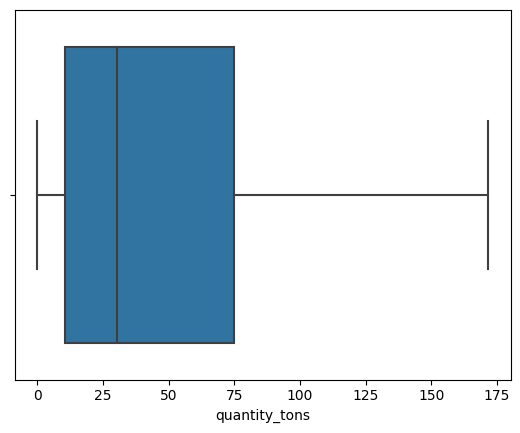

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'datas' with your data
sns.boxplot(x='quantity_tons', data=datas)

# Show the plot
plt.show()


# Application

In [30]:
q3 = datas.application.quantile(0.75)
q1 = datas.application.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(87.5, -36.5)

In [31]:
datas['application'] = datas['application'].clip(upper_tres,lower_tres)

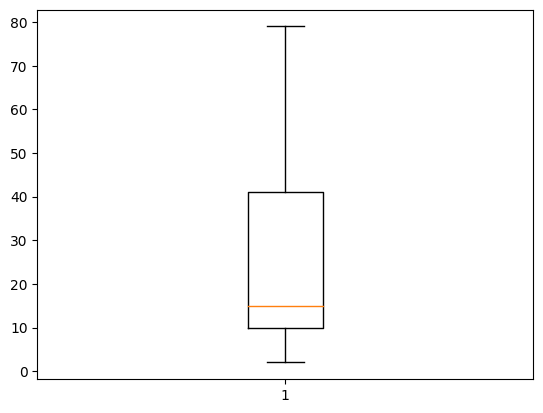

In [32]:
# Creating plot
plt.boxplot(datas['application'])
 
# show plot
plt.show()

# Thickness

In [33]:
q3 = datas.thickness.quantile(0.75)
q1 = datas.thickness.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(6.525, -2.8750000000000004)

In [34]:
datas['thickness'] = datas['thickness'].clip(upper_tres,lower_tres)

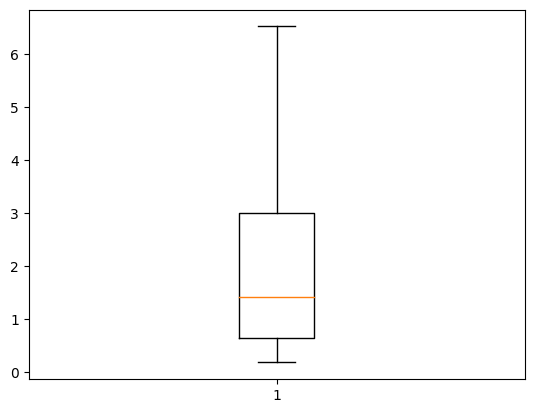

In [35]:
# Creating plot
plt.boxplot(datas['thickness'])
 
# show plot
plt.show()

# width

In [36]:
q3 = datas.width.quantile(0.75)
q1 = datas.width.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(1989.0, 685.0)

In [37]:
datas['width'] = datas['width'].clip(upper_tres,lower_tres)

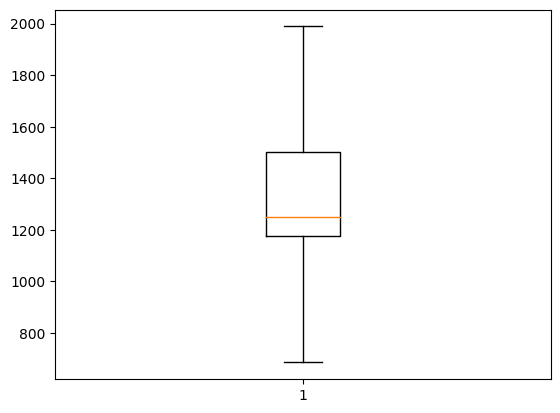

In [38]:
# Creating plot
plt.boxplot(datas['width'])
 
# show plot
plt.show()

# selling price

In [39]:
q3 = datas.selling_price.quantile(0.75)
q1 = datas.selling_price.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres,lower_tres

(1358.5, 234.5)

In [40]:
datas['selling_price'] = datas['selling_price'].clip(upper_tres,lower_tres)

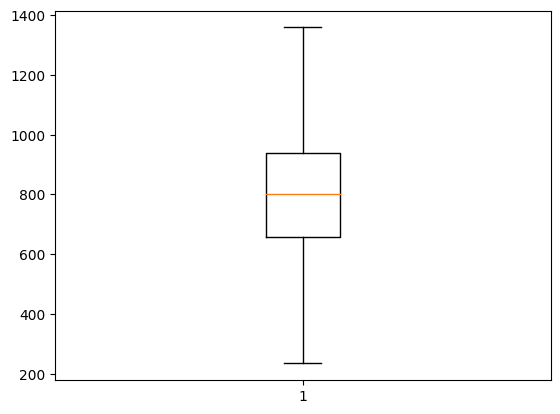

In [41]:
# Creating plot
plt.boxplot(datas['selling_price'])
 
# show plot
plt.show()

# skewness

In [ ]:
Skewness:

Definition: Skewness measures the asymmetry of the probability distribution of a dataset. 
It quantifies how the data is distributed in terms of its shape and whether it is symmetric or not.

Purpose: Skewness helps you understand the shape of the data distribution. 
It tells you if the data is more concentrated on one side of the mean or if it's evenly distributed. 
Positive skewness indicates a right-skewed distribution, while negative skewness indicates a left-skewed distribution.

<Figure size 800x600 with 0 Axes>

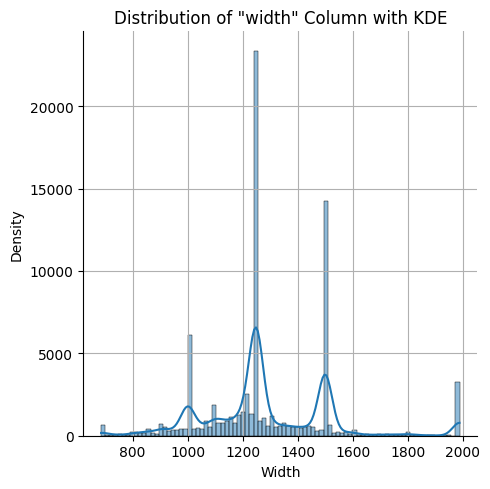

In [42]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(datas['width'], kde=True)
plt.xlabel('Width')
plt.ylabel('Density')
plt.title('Distribution of "width" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

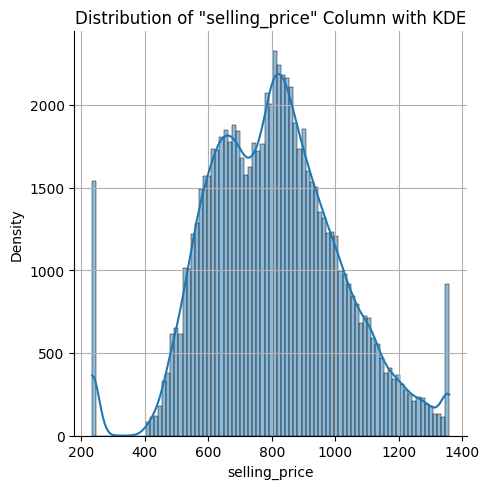

In [43]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(datas['selling_price'], kde=True)
plt.xlabel('selling_price')
plt.ylabel('Density')
plt.title('Distribution of "selling_price" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

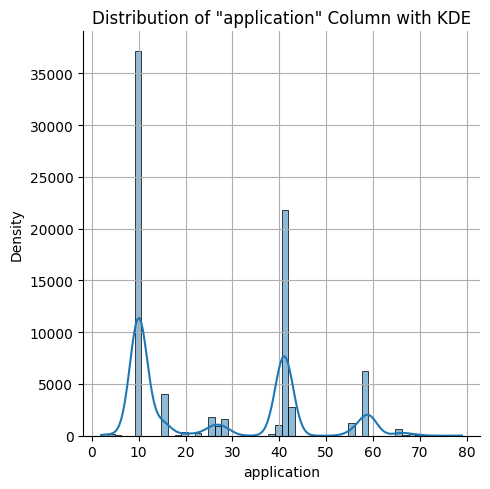

In [44]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(datas['application'], kde=True)
plt.xlabel('application')
plt.ylabel('Density')
plt.title('Distribution of "application" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

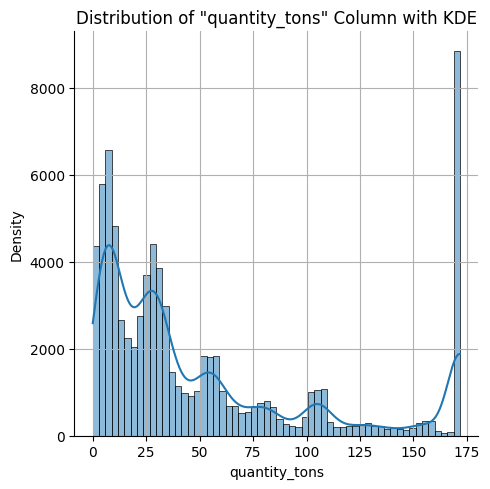

In [45]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(datas['quantity_tons'], kde=True)
plt.xlabel('quantity_tons')
plt.ylabel('Density')
plt.title('Distribution of "quantity_tons" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

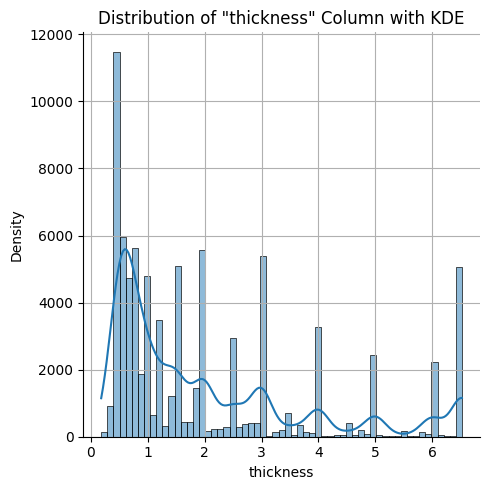

In [46]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(datas['thickness'], kde=True)
plt.xlabel('thickness')
plt.ylabel('Density')
plt.title('Distribution of "thickness" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Treating skewness

In [ ]:
Identify Skewness:

    Begin by visually inspecting your data using histograms, density plots, or 
    skewness coefficients to determine whether skewness is present and its direction (positive or negative).
    Choose Appropriate Transformation:

Select a transformation method based on the type of skewness:
Positive Skewness (Right Skewed):
     Apply a logarithmic transformation (e.g., natural logarithm or base 10).
    Try a square root transformation.
    Consider a Box-Cox transformation if appropriate.
Negative Skewness (Left Skewed):
    Consider an inverse transformation (e.g., 1/x).

If this value is between: -0.5 and 0.5, the distribution of the value is almost symmetrical.
-1 and -0.5, the data is negatively skewed, 
 and 
f it is between 0.5 to 1, 
the data is positively skewed. The skewness is moderate

In [ ]:
# Positive skewness (Right Skewed)
log_transformed_data = np.log(data)
sqrt_transformed_data = np.sqrt(data)

# Negative skewness 
inverse_transformed_data = 1 / data

# If this value is between: -0.5 and 0.5, the distribution of the value is almost symmetrical.
# -1 and -0.5, the data is negatively skewed, 
# and 
# f it is between 0.5 to 1, the data is positively skewed.

In [47]:
datas['thickness_log'] =np.log(datas['thickness'])

In [48]:
datas['thickness'].skew(),datas['thickness_log'].skew()

(1.2425099057623985, 0.23559031372106684)

In [49]:
datas['width_log'] = np.cbrt(datas['width'])

In [50]:
datas['width'].skew(),datas['width_log'].skew()

(0.7054910340415504, 0.16994993515908066)

In [51]:
datas['width_log'].dtype

dtype('float64')

In [52]:
datas['selling_price'].skew()# This is normally symmertrical so no need transformation

0.12081611251480388

In [53]:
datas['selling_price'].dtype

dtype('float64')

In [54]:
from scipy import stats
datas['quantity_tons_log'], lam = stats.boxcox(datas['quantity_tons'])

In [55]:
datas['quantity_tons_log'], lam .dtype

(0         6.051334
 2         8.880757
 3         8.880757
 4         8.880757
 6         1.427984
             ...   
 181601    1.504963
 181602    4.088238
 181603    3.653948
 181604    3.723493
 181605    5.104417
 Name: quantity_tons_log, Length: 81024, dtype: float64,
 dtype('float64'))

In [56]:
datas['quantity_tons'].skew(),datas['quantity_tons_log'].skew()

(1.1933036401800192, -0.05410425366150814)

In [57]:
datas['application_log'] = np.log(datas['application'])

In [58]:
datas['application'].skew(),datas['application_log'].skew()

(0.506656959512981, 0.12628523471536643)

In [59]:
datas['application_log'].dtype

dtype('float64')

<Axes: xlabel='thickness_log', ylabel='Density'>

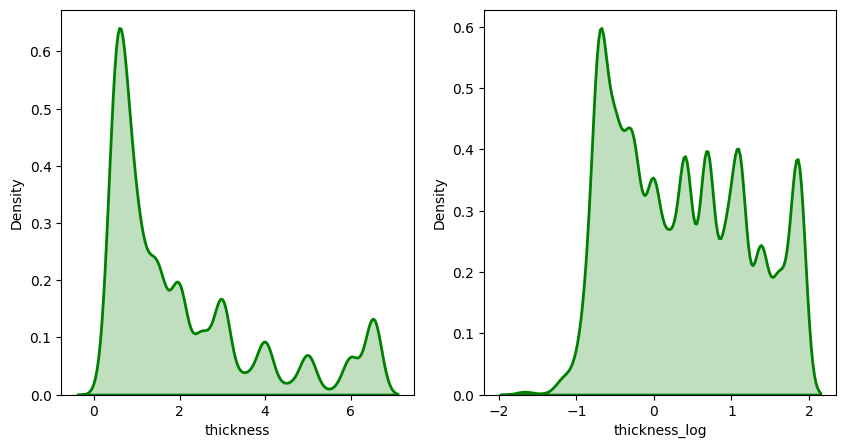

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(datas['thickness'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(datas['thickness_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

<Axes: xlabel='application_log', ylabel='Density'>

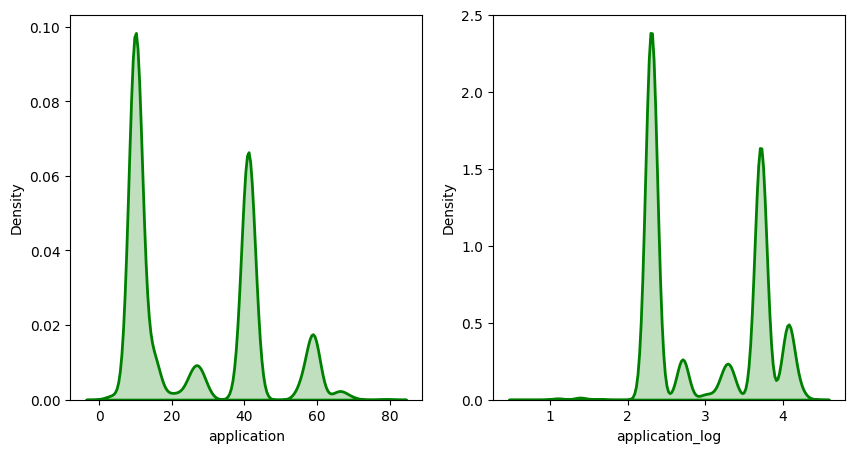

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(datas['application'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(datas['application_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

<Axes: xlabel='quantity_tons_log', ylabel='Density'>

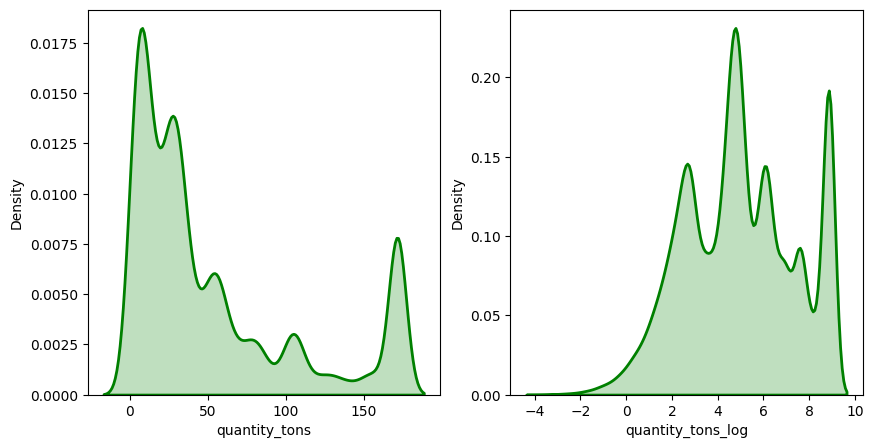

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(datas['quantity_tons'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(datas['quantity_tons_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

<Axes: xlabel='width_log', ylabel='Density'>

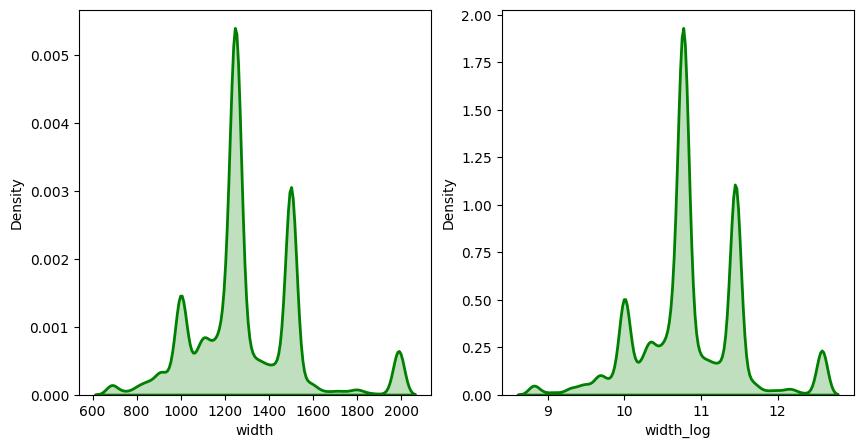

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(datas['width'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(datas['width_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

<Axes: xlabel='selling_price', ylabel='Density'>

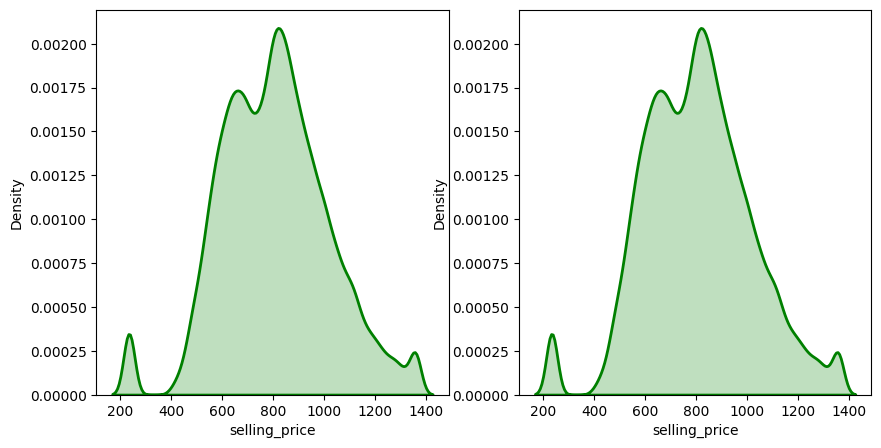

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(datas['selling_price'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(datas['selling_price'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

# Encoding

In [ ]:
One-Hot Encoding: One-hot encoding is a popular technique where each category is converted into a binary vector. Each category is represented by a unique column, and the presence of a category is indicated by a 1 in the corresponding column, while all other columns contain 0s.

Example:
Original categorical column: ["Red", "Green", "Blue"]
One-hot encoded columns:

Red: [1, 0, 0]
Green: [0, 1, 0]
Blue: [0, 0, 1]
    
Label Encoding: Label encoding involves assigning a unique integer to each category. 
This method is suitable for ordinal data, where there is an inherent order among categories.
However, it may not be suitable for nominal data.

Example:
Original categorical column: ["Low", "Medium", "High"]
Label encoded column: [0, 1, 2]

Binary Encoding: Binary encoding combines the advantages of one-hot encoding and label encoding. 
It converts categories into binary code and then encodes them as integers.
It can be more memory-efficient than one-hot encoding.

Ordinal Encoding: Ordinal encoding is used when there is a clear order or ranking among categories.
Categories are mapped to integers according to their order.

Example:
Original categorical column: ["Low", "Medium", "High"]
Ordinal encoded column: [0, 1, 2]

The choice of encoding method depends on the nature of the data, the machine learning algorithm being used, and 
the specific problem you are trying to solve. Choosing the right encoding method is crucial to ensure that 
the encoded data represents the underlying information accurately and does not introduce biases into your
machine learning models.

In [65]:
datas.nunique()

id                   81024
item_date              230
quantity_tons        72253
customer               694
country                 16
status                   8
item type                6
application             29
thickness              364
width                  921
material_ref         11495
product_ref             26
delivery_date           22
selling_price         5467
thickness_log          364
width_log              921
quantity_tons_log    72253
application_log         29
dtype: int64

In [66]:
one_hot_encoded = pd.get_dummies(datas, columns=['item type','status'], drop_first=True)
one_hot_encoded


,id,item_date,quantity_tons,customer,country,application,thickness,width,material_ref,product_ref,...,item type_S,item type_W,item type_WI,status_Lost,status_Not lost for AM,status_Offerable,status_Offered,status_Revised,status_To be approved,status_Won
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01 00:00:00.020210401,54.151139,30156308.0,28.0,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,...,0,1,0,0,0,0,0,0,0,1
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-01-01 00:00:00.020210401,171.759354,30153963.0,30.0,28.0,0.38,952.0,S0380700,628377,...,0,0,1,0,0,0,0,0,0,1
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-01-01 00:00:00.020210401,171.759354,30349574.0,32.0,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,...,1,0,0,0,0,0,0,0,0,1
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-01-01 00:00:00.020210401,171.759354,30211560.0,28.0,10.0,4.00,1989.0,2_S275JR+AR-CL1,640665,...,0,1,0,0,0,0,0,0,0,1
6,E1B47219-42C8-411D-AE46-AD5256DC4757,1970-01-01 00:00:00.020210401,3.522613,30209509.0,30.0,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,611993,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181601,9520F0DD-4EA3-4D35-B23A-35908C5E77CA,1970-01-01 00:00:00.020200702,3.739726,30267349.0,84.0,10.0,2.00,1500.0,1S220A100P6FSB,164141591,...,0,1,0,0,0,0,0,1,0,0
181602,D85912F7-0002-4EC5-9CFD-AD3803F44D91,1970-01-01 00:00:00.020200702,20.155119,30267349.0,84.0,10.0,2.00,1500.0,1S220A100P6FSA,164141591,...,0,1,0,0,0,0,0,1,0,0
181603,E6A94878-F80E-4852-A217-928D6D9C4A28,1970-01-01 00:00:00.020200702,15.742266,30267349.0,84.0,10.0,2.00,1000.0,1S220A100P6FSA,164141591,...,0,1,0,0,0,0,0,1,0,0
181604,B40F8127-D4AC-44B6-B200-FED2690EA8EF,1970-01-01 00:00:00.020200702,16.391009,30267349.0,84.0,10.0,2.00,1250.0,1S220A100P6FSA,164141591,...,0,1,0,0,0,0,0,1,0,0


In [67]:
one_hot_encoded.columns

Index(['id', 'item_date', 'quantity_tons', 'customer', 'country',
       'application', 'thickness', 'width', 'material_ref', 'product_ref',
       'delivery_date', 'selling_price', 'thickness_log', 'width_log',
       'quantity_tons_log', 'application_log', 'item type_Others',
       'item type_PL', 'item type_S', 'item type_W', 'item type_WI',
       'status_Lost', 'status_Not lost for AM', 'status_Offerable',
       'status_Offered', 'status_Revised', 'status_To be approved',
       'status_Won'],
      dtype='object')

In [68]:
one_hot_encoded.dtypes

id                                object
item_date                 datetime64[ns]
quantity_tons                    float64
customer                         float64
country                          float64
application                      float64
thickness                        float64
width                            float64
material_ref                      object
product_ref                        int64
delivery_date             datetime64[ns]
selling_price                    float64
thickness_log                    float64
width_log                        float64
quantity_tons_log                float64
application_log                  float64
item type_Others                   uint8
item type_PL                       uint8
item type_S                        uint8
item type_W                        uint8
item type_WI                       uint8
status_Lost                        uint8
status_Not lost for AM             uint8
status_Offerable                   uint8
status_Offered  

# Feature engineering

In [69]:
#correlation-features are strongly correlated with the target variable and, therefore, likely to be important for prediction

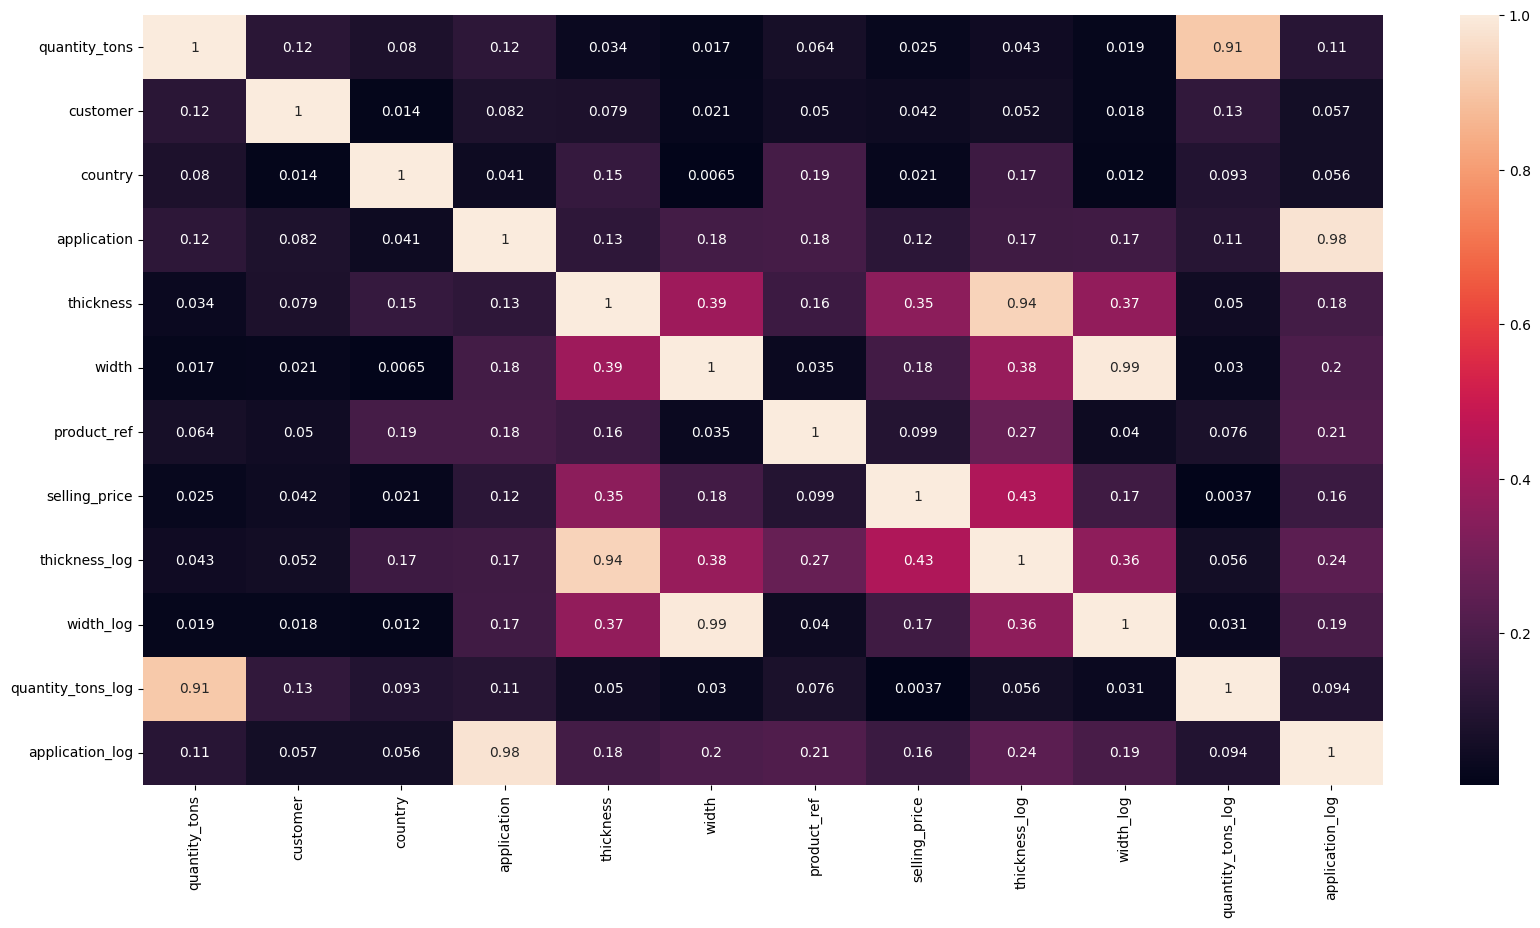

In [70]:
# Select only numeric columns from your DataFrame
numeric_data = datas.select_dtypes(include=[np.number])

# Create a correlation matrix for numeric columns
correlation_matrix = numeric_data.corr().abs()
#if this code not working add [255] code top of this code
# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Model Building and Evaluation

# Split the dataset into training and testing/validation set

In [71]:
# independent features after encoding
X = one_hot_encoded[[ 'thickness_log', 'width_log',
       'quantity_tons_log', 'application_log', 'item type_Others',
       'item type_PL', 'item type_S', 'item type_W', 'item type_WI',
       'status_Lost', 'status_Not lost for AM', 'status_Offerable',
       'status_Offered', 'status_Revised', 'status_To be approved',
       'status_Won']].values
#important feature

y=datas[['selling_price']].values#predicted targets

In [72]:
X.shape

(81024, 16)

In [73]:
y.shape

(81024, 1)

In [74]:
# import pandas
# a={'name':['raja','rakessh'],
#    'age':[25,26]}
# frame=pd.DataFrame(a)
# frame

In [75]:
# frame['place']=['chennai','kovai']

In [76]:
#scales features to a specified range, typically [0, 1],

In [77]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X


array([[ 0.38618471,  0.91521775,  0.44533218, ..., -0.12784562,
        -0.17271603,  0.60554632],
       [-1.54561776, -1.51228717,  1.615364  , ..., -0.12784562,
        -0.17271603,  0.60554632],
       [ 0.54875916,  0.18257195,  1.615364  , ..., -0.12784562,
        -0.17271603,  0.60554632],
       ...,
       [ 0.38618471, -1.26704363, -0.54604254, ...,  7.82193425,
        -0.17271603, -1.65140133],
       [ 0.38618471, -0.10262175, -0.5172839 , ...,  7.82193425,
        -0.17271603, -1.65140133],
       [-1.01430541,  0.06034592,  0.05376014, ..., -0.12784562,
        -0.17271603,  0.60554632]])

In [78]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Model fitiing

In [79]:
Regression Algorithms:

Linear Regression: Models the linear relationship between input features and the target variable.

Decision Tree Regression: Uses decision trees to make predictions in regression tasks.

Random Forest Regression: An ensemble of decision trees for improved regression performance.

Support Vector Regression (SVR): Extends support vector machines to regression problems.

Lasso Regression: Linear regression with L1 regularization, useful for feature selection.

Ridge Regression: Linear regression with L2 regularization, which helps prevent overfitting.

ElasticNet Regression: Combines L1 and L2 regularization.

Gradient Boosting (e.g., XGBoost, LightGBM): Ensemble methods that can be used for regression tasks.

K-Nearest Neighbors (K-NN) Regression: Predicts values based on the average of the k-nearest neighbors' target values.

Polynomial Regression: Fits a polynomial function to the data.

Classification Algorithms:

Logistic Regression: Used for binary classification problems.

Decision Trees: Decision trees can be used for both binary and multi-class classification.

Random Forest: An ensemble of decision trees for classification tasks.

Support Vector Machines (SVM): Effective for both binary and multi-class classification.

Naive Bayes: Uses Bayes' theorem for classification, often used for text classification.

K-Nearest Neighbors (K-NN) Classification: Classifies data points based on the majority class of their k-nearest neighbors.

Gradient Boosting (e.g., XGBoost, LightGBM): Ensemble methods that can be used for classification tasks.

Neural Networks (Deep Learning): Multi-layer neural networks for complex classification problems.

Linear Discriminant Analysis (LDA): Reduces dimensionality while preserving class separability.

Principal Component Analysis (PCA): Dimensionality reduction technique often used before applying other classifiers.

SyntaxError: unterminated string literal (detected at line 19) (3159513113.py, line 19)

In [ ]:
# Import the necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Create a Random Forest regression model
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  
# You can choose the number of trees (n_estimators) and other hyperparameters

# Train the Random Forest model on the training data
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_regressor.predict(X_test)

# Evaluate the model using mean squared error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

In [ ]:
from sklearn.model_selection import cross_val_score

k = 5
cv_scores = cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error')
print(cv_scores)

# Note: Negative of MSE is used because scikit-learn reports negative values for loss functions.

# Convert negative scores back to positive
# mse_scores = -cv_scores

# # Calculate Mean and Standard Deviation of MSE scores
# mean_mse = np.mean(mse_scores)
# std_mse = np.std(mse_scores)

# print(f'Mean MSE across {k}-folds: {mean_mse}')
# print(f'Standard Deviation of MSE: {std_mse}')

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

# Calculate training score
training_score = model.score(X_train, y_train)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Calculate Mean Cross-Validation Score
mean_cv_score = np.mean(cv_scores)

# Print scores
print(f'Training Score: {training_score}')
print(f'Cross-Validation Score: {mean_cv_score}')

# evaluation metrics

In [ ]:
#extra_tree_model

In [212]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE=mean_absolute_error(y_test,predict_val)
MSE=mean_squared_error(y_test,predict_val)
r2 = r2_score(y_test,predict_val)

print("MAE :",MAE,"\nMSE :",MSE,"\nR2 :",r2)

MAE : 113.32812056859922 
MSE : 22679.568198290617 
R2 : 0.47996390118883103


In [ ]:
#linera regression

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
# (The R-squared value will be between 0 and 1, where higher values indicate a better fit of the model to the data.)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")


In [ ]:
The code you've provided is an example of a Python dictionary called param_grid. This dictionary is commonly used in the context of hyperparameter tuning for machine learning models, particularly for decision trees and random forests. Let me explain each part of the param_grid dictionary:

'max_depth': This is a hyperparameter for decision trees and random forests that determines the maximum depth of the tree.
    A higher value allows the tree to be deeper, potentially capturing more complex relationships in the data. 
    The values [2, 5, 10, 20] represent different candidate values for max_depth that you want to try during hyperparameter 
    tuning.

'min_samples_split': This hyperparameter specifies the minimum number of samples 
    required to split an internal node in a decision tree or random forest. 
    Smaller values can lead to more complex trees, while larger values can result in simpler trees.
    The values [2, 5, 10] represent different candidate values for min_samples_split.

'min_samples_leaf': This hyperparameter determines the minimum number of samples 
    required to be in a leaf node (a terminal node) of the tree.
    Like min_samples_split, smaller values lead to more complex trees,
    while larger values lead to simpler trees. The values [1, 2, 4] represent different candidate values for min_samples_leaf.

'max_features': This hyperparameter controls the maximum number of features to consider when
    making a split in a decision tree or random forest. It can help prevent overfitting by limiting
    the number of features used at each split. The values ['auto', 'sqrt', 'log2'] represent 
    different ways to choose the maximum number of features: 'auto' typically means using all features,
        'sqrt' means using the square root of the total number of features, and 'log2' means 
        using the base-2 logarithm of the total number of features.

The purpose of this param_grid dictionary is to define a grid of hyperparameters
and their potential values that you want to search through during a hyperparameter tuning process.
Techniques like grid search or random search can use this grid to systematically explore different
combinations of hyperparameters to find the set of hyperparameters that result in the best model
performance on a validation dataset. This helps in optimizing the model for a specific machine
learning task by selecting the most suitable hyperparameters from the provided options.


In [87]:
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [88]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [89]:
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)


Mean squared error: 18533.148513533026
R-squared: 0.5750401344769805


In [91]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(one_hot_encoded, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(one_hot_encoded, f)

In [ ]:
'thickness_log', 'width_log',
       'quantity_tons_log', 'application_log', 'item type_Others',
       'item type_PL', 'item type_S', 'item type_W', 'item type_WI',
       'status_Lost', 'status_Not lost for AM', 'status_Offerable',
       'status_Offered', 'status_Revised', 'status_To be approved',
       'status_Won'

In [98]:
one_hot_encoded.columns

Index(['id', 'item_date', 'quantity_tons', 'customer', 'country',
       'application', 'thickness', 'width', 'material_ref', 'product_ref',
       'delivery_date', 'selling_price', 'thickness_log', 'width_log',
       'quantity_tons_log', 'application_log', 'item type_Others',
       'item type_PL', 'item type_S', 'item type_W', 'item type_WI',
       'status_Lost', 'status_Not lost for AM', 'status_Offerable',
       'status_Offered', 'status_Revised', 'status_To be approved',
       'status_Won'],
      dtype='object')

In [101]:
one_hot_encoded

,id,item_date,quantity_tons,customer,country,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,thickness_log,width_log,quantity_tons_log,application_log,item type_Others,item type_PL,item type_S,item type_W,item type_WI,status_Lost,status_Not lost for AM,status_Offerable,status_Offered,status_Revised,status_To be approved,status_Won
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01 00:00:00.020210401,54.151139,30156308.0,28.0,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01 00:00:00.020210701,854.00,0.693147,11.447142,6.051334,2.302585,0,0,0,1,0,0,0,0,0,0,0,1
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-01-01 00:00:00.020210401,171.759354,30153963.0,30.0,28.0,0.38,952.0,S0380700,628377,1970-01-01 00:00:00.020210101,644.33,-0.967584,9.837369,8.880757,3.332205,0,0,0,0,1,0,0,0,0,0,0,1
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-01-01 00:00:00.020210401,171.759354,30349574.0,32.0,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01 00:00:00.020210101,768.00,0.832909,10.961296,8.880757,4.077537,0,0,1,0,0,0,0,0,0,0,0,1
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-01-01 00:00:00.020210401,171.759354,30211560.0,28.0,10.0,4.00,1989.0,2_S275JR+AR-CL1,640665,1970-01-01 00:00:00.020210301,577.00,1.386294,12.576069,8.880757,2.302585,0,0,0,1,0,0,0,0,0,0,0,1
6,E1B47219-42C8-411D-AE46-AD5256DC4757,1970-01-01 00:00:00.020210401,3.522613,30209509.0,30.0,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,611993,1970-01-01 00:00:00.020210701,234.50,-0.967584,10.400419,1.427984,3.713572,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181601,9520F0DD-4EA3-4D35-B23A-35908C5E77CA,1970-01-01 00:00:00.020200702,3.739726,30267349.0,84.0,10.0,2.00,1500.0,1S220A100P6FSB,164141591,1970-01-01 00:00:00.020200701,622.81,0.693147,11.447142,1.504963,2.302585,0,0,0,1,0,0,0,0,0,1,0,0
181602,D85912F7-0002-4EC5-9CFD-AD3803F44D91,1970-01-01 00:00:00.020200702,20.155119,30267349.0,84.0,10.0,2.00,1500.0,1S220A100P6FSA,164141591,1970-01-01 00:00:00.020200701,619.81,0.693147,11.447142,4.088238,2.302585,0,0,0,1,0,0,0,0,0,1,0,0
181603,E6A94878-F80E-4852-A217-928D6D9C4A28,1970-01-01 00:00:00.020200702,15.742266,30267349.0,84.0,10.0,2.00,1000.0,1S220A100P6FSA,164141591,1970-01-01 00:00:00.020200701,628.52,0.693147,10.000000,3.653948,2.302585,0,0,0,1,0,0,0,0,0,1,0,0
181604,B40F8127-D4AC-44B6-B200-FED2690EA8EF,1970-01-01 00:00:00.020200702,16.391009,30267349.0,84.0,10.0,2.00,1250.0,1S220A100P6FSA,164141591,1970-01-01 00:00:00.020200701,615.81,0.693147,10.772173,3.723493,2.302585,0,0,0,1,0,0,0,0,0,1,0,0


In [100]:
pd.set_option('display.max_columns', 500)

In [104]:
new_sample = np.array([[1.386294, 12.576069, 8.880757, 4.077537, 0,0,0,1,0,0,0,0,0,0,0,1]])
# new_sample_ohe = one_hot_encoded.transform(new_sample[:, [7]]).toarray()
# new_sample_be = one_hot_encoded.transform(new_sample[:, [8]]).toarray()
# new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', (new_pred))

Predicted selling price: [640.01840516]
